In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import statsmodels.api as sm

In [222]:
def encode_categorical(df, categorical_columns):
    return pd.get_dummies(df, columns=categorical_columns)

def scale_data(df):
    scaler = StandardScaler()
    df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))
    return df

In [223]:
##### Load the dataset into a pandas DataFrame
df = pd.read_csv('/home/davy/Documents/jupyter/bin/salaries.csv')  # Replace with your actual file path

# Display the first few rows of the dataset
print(df.head())

# Check the data types of each column
print(df.dtypes)

   work_year experience_level employment_type           job_title  salary  \
0       2025               SE              FT  Solutions Engineer  214000   
1       2025               SE              FT  Solutions Engineer  136000   
2       2025               MI              FT       Data Engineer  158800   
3       2025               MI              FT       Data Engineer  139200   
4       2025               EN              FT       Data Engineer   90000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         214000                 US           100   
1             USD         136000                 US           100   
2             USD         158800                 AU             0   
3             USD         139200                 AU             0   
4             USD          90000                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               AU  

In [224]:
df.loc[(df["job_title"].str.contains("AI")) | (df["job_title"].str.contains("ML")), "job_title"].value_counts()[0:5]

job_title
AI Engineer       1620
AI Architect       251
AI Developer       198
MLOps Engineer     176
AI Scientist       110
Name: count, dtype: int64

In [225]:
df.loc[(df["job_title"].str.contains("AI")) | (df["job_title"].str.contains("ML")), ["job_title", "salary_in_usd"]].groupby("job_title").mean()

,salary_in_usd
job_title,
AI Architect,213443.450199
AI Content Writer,40506.666667
AI Data Engineer,94444.000000
AI Data Scientist,81004.000000
AI Developer,152523.277778
AI Engineer,173341.854938
AI Engineering Lead,23649.000000
AI Engineering Manager,179930.500000
AI Governance Lead,126582.000000


In [226]:
# 1. Define the filter condition
ai_ml_jobs_filter = (df["job_title"].str.contains("AI", case=False)) | \
                    (df["job_title"].str.contains("ML", case=False))

# 2. Apply the filter and then perform the grouped aggregations
# Select the relevant columns after filtering
filtered_df = df.loc[ai_ml_jobs_filter, ["job_title", "salary_in_usd"]]

# Group by 'job_title' and apply multiple aggregations using .agg()
combined_stats = filtered_df.groupby("job_title").agg(
    count=('job_title', 'count'),  # Count occurrences of each job_title
    average_salary=('salary_in_usd', 'mean') # Calculate mean of salary_in_usd
).sort_values(by='count', ascending=False) # Sort by count if desired, similar to value_counts default

print("Combined Job Counts and Average Salaries for AI/ML related jobs:")
print(combined_stats)

# If you specifically want the top 5 by count, you can slice the result:
print("\nTop 5 AI/ML related jobs by count with their average salary:")
print(combined_stats.head(5))

Combined Job Counts and Average Salaries for AI/ML related jobs:
                                  count  average_salary
job_title                                              
AI Engineer                        1620   173341.854938
AI Architect                        251   213443.450199
AI Developer                        198   152523.277778
MLOps Engineer                      176   163674.039773
AI Scientist                        110   175523.236364
AI Specialist                        96   140837.750000
AI Researcher                        90   179670.400000
Head of AI                           52   250161.596154
ML Scientist                         34   180332.588235
AI Lead                              31   187603.483871
AI Product Manager                   27   195172.222222
AI Product Owner                     22   128142.409091
ML Infrastructure Engineer           18   229300.000000
GenAI Architect                      12   203958.333333
AI Data Scientist                    11

In [227]:
df = df[df["job_title"] == "AI Engineer"]

In [228]:
CATEGORICAL_COLUMNS = ["experience_level", "employment_type", "company_location", "company_size"]

In [229]:
DROP_COLUMNS = ["salary_currency", "employee_residence", "job_title", "salary"]
df.drop(DROP_COLUMNS, axis = 1, inplace=True)

In [230]:
location_counts = df["company_location"].value_counts()
locations_to_keep = location_counts[location_counts >= 3].index
locations_to_keep

Index(['US', 'GB', 'CA', 'DE', 'LT', 'AT', 'ES', 'BR', 'MX', 'IN', 'NL', 'TR',
       'AU', 'PL', 'SK', 'CO', 'BE'],
      dtype='object', name='company_location')

In [231]:
# df = df[df["company_location"].isin(locations_to_keep)]

In [232]:
# df["company_location"] = df["company_location"].apply(lambda x: "US" if x == "US" else "OT")

In [233]:
df = pd.get_dummies(df, columns=CATEGORICAL_COLUMNS, drop_first=True)

In [234]:
# Find columns that are boolean
bool_cols = df.select_dtypes(include='bool').columns
# Convert them to int
df[bool_cols] = df[bool_cols].astype(int)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1620 entries, 251 to 127286
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   work_year            1620 non-null   int64
 1   salary_in_usd        1620 non-null   int64
 2   remote_ratio         1620 non-null   int64
 3   experience_level_EX  1620 non-null   int64
 4   experience_level_MI  1620 non-null   int64
 5   experience_level_SE  1620 non-null   int64
 6   employment_type_FT   1620 non-null   int64
 7   employment_type_PT   1620 non-null   int64
 8   company_location_AT  1620 non-null   int64
 9   company_location_AU  1620 non-null   int64
 10  company_location_BE  1620 non-null   int64
 11  company_location_BR  1620 non-null   int64
 12  company_location_CA  1620 non-null   int64
 13  company_location_CO  1620 non-null   int64
 14  company_location_CZ  1620 non-null   int64
 15  company_location_DE  1620 non-null   int64
 16  company_location_ES  1620

In [236]:
df.head(5)

,work_year,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,employment_type_PT,company_location_AT,company_location_AU,...,company_location_QA,company_location_RO,company_location_SI,company_location_SK,company_location_TR,company_location_UA,company_location_US,company_location_ZA,company_size_M,company_size_S
251,2025,200900,100,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
252,2025,133900,100,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
352,2025,190000,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
353,2025,145000,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
571,2025,223400,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [237]:
df.columns

Index(['work_year', 'salary_in_usd', 'remote_ratio', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'employment_type_FT',
       'employment_type_PT', 'company_location_AT', 'company_location_AU',
       'company_location_BE', 'company_location_BR', 'company_location_CA',
       'company_location_CO', 'company_location_CZ', 'company_location_DE',
       'company_location_ES', 'company_location_FR', 'company_location_GB',
       'company_location_GR', 'company_location_IE', 'company_location_IL',
       'company_location_IN', 'company_location_IT', 'company_location_JP',
       'company_location_LT', 'company_location_LU', 'company_location_LV',
       'company_location_MX', 'company_location_NL', 'company_location_OM',
       'company_location_PH', 'company_location_PL', 'company_location_PT',
       'company_location_QA', 'company_location_RO', 'company_location_SI',
       'company_location_SK', 'company_location_TR', 'company_location_UA',
       'compan

In [238]:
X = df.drop(['salary_in_usd'], axis=1) # Drop original salary and the target itself
y = df['salary_in_usd']

In [239]:
# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

In [240]:
X

,const,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,employment_type_PT,company_location_AT,company_location_AU,...,company_location_QA,company_location_RO,company_location_SI,company_location_SK,company_location_TR,company_location_UA,company_location_US,company_location_ZA,company_size_M,company_size_S
251,1.0,2025,100,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
252,1.0,2025,100,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
352,1.0,2025,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
353,1.0,2025,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
571,1.0,2025,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126702,1.0,2023,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
126763,1.0,2023,100,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
126957,1.0,2023,100,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
127285,1.0,2023,100,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [241]:
# Fit the model using Ordinary Least Squares (OLS) regression
model = sm.OLS(y, X).fit()

# Display the summary, including p-values for each feature
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     10.20
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           7.64e-58
Time:                        20:05:46   Log-Likelihood:                -20452.
No. Observations:                1620   AIC:                         4.099e+04
Df Residuals:                    1576   BIC:                         4.123e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.318e+07   7

In [242]:
# Define a significance level
significance_level = 0.02

# Perform backward elimination
while True:
    # Fit the model
    model = sm.OLS(y, X).fit()
    # Get the highest p-value in the model
    max_p_value = model.pvalues.max()
    
    # Check if the highest p-value is greater than the significance level
    if max_p_value > significance_level:
        # Identify the feature with the highest p-value
        feature_to_remove = model.pvalues.idxmax()
        print(f"Removing feature: {feature_to_remove} with p-value: {max_p_value}")
        
        # Drop the feature
        X = X.drop(columns=[feature_to_remove])
    else:
        break

# Display the final model summary
print(model.summary())

Removing feature: company_location_AU with p-value: 0.9928682395797525
Removing feature: company_location_LU with p-value: 0.9952819130118661
Removing feature: company_location_GB with p-value: 0.9508597645896798
Removing feature: company_location_GR with p-value: 0.8163821748213944
Removing feature: company_location_PT with p-value: 0.8084102333703747
Removing feature: company_location_LV with p-value: 0.7574473626842342
Removing feature: company_location_IE with p-value: 0.708916549547034
Removing feature: company_location_IT with p-value: 0.7013161711979436
Removing feature: employment_type_PT with p-value: 0.640755114534129
Removing feature: company_location_CO with p-value: 0.6267266123519326
Removing feature: company_location_DE with p-value: 0.6191592726352234
Removing feature: company_location_BR with p-value: 0.5430697183180402
Removing feature: company_location_CZ with p-value: 0.49964324442004804
Removing feature: company_location_FR with p-value: 0.4867692645909134
Removing

In [243]:
X

,const,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,company_location_CA,company_location_QA,company_location_US
251,1.0,2025,100,0,1,0,1,0,0,1
252,1.0,2025,100,0,1,0,1,0,0,1
352,1.0,2025,0,0,0,1,1,0,0,1
353,1.0,2025,0,0,0,1,1,0,0,1
571,1.0,2025,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
126702,1.0,2023,0,0,0,1,1,0,0,1
126763,1.0,2023,100,0,0,1,1,0,0,0
126957,1.0,2023,100,0,1,0,1,0,1,0
127285,1.0,2023,100,0,0,1,1,0,0,1


In [244]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns in the training data
numerical_cols = X_train.select_dtypes(include=[np.number]).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training numerical data and transform it
X_train_scaled = X_train.copy() # Work on a copy to avoid SettingWithCopyWarning
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# --- 3. Scale the Test Data using the *FITTED* Scaler ---
# Do NOT refit the scaler here! Use transform()
X_test_scaled = X_test.copy() # Work on a copy
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols]) # Use transform!

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# You can also inspect the coefficients
# print("\nModel Coefficients:")
# for feature, coef in zip(X.columns, model.coef_):
#     print(f"{feature}: {coef:.2f}")


Mean Squared Error (MSE): 5264708870.13
R-squared (R2): 0.21


In [245]:
A_train = X_train_scaled.copy()
A_train["salary_in_usd"] = y_train.values

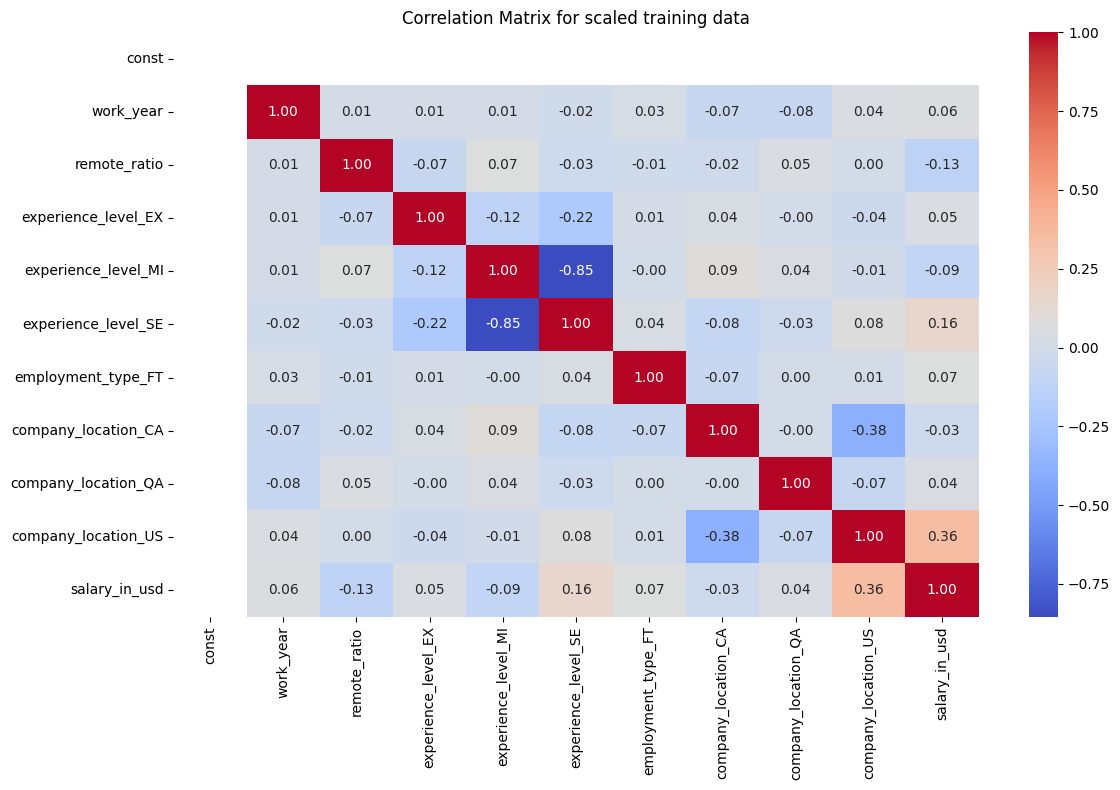

In [246]:
# Display the correlation matrix for X_train_scaled
import seaborn as sns
plt.figure(figsize=(12, 8))
corr_matrix = A_train.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for scaled training data')
plt.tight_layout()
plt.show()